## Scraping car data from cars.com
    * https://medium.com/analytics-vidhya/scraping-car-prices-using-python-97086c30cd65

In [1]:
from bs4 import BeautifulSoup as bs
from requests import get
import pandas as pd
import os
import re
import ast
import datetime as dt
import numpy as np
import json

### Basic script

In [ ]:
# base_url =  "https://www.cars.com/for-sale/searchresults.action/?prMx=15000&rd=50&searchSource=QUICK_FORM&zc=97230"
# response = get(base_url)
# print(response)

# html = get(base_url).text
# soup = bs(html, 'lxml')
# results = soup.find_all('div', class_= 'listing-row__details')
# print(results)

In [ ]:
# for result in results:
#     car_name=result.find("h2", class_= "listing-row__title").text.strip()
#     car_age=result.find("div", class_="listing-row__stocktype").text.strip()
#     car_price=result.find("div", class_="payment-section").find("span", class_="listing-row__price").text.strip()
#     try:
#         car_mileage=result.find("div", class_="payment-section").find("span", class_="listing-row__mileage").text.strip()
#     except AttributeError:
#         pass
#     car_ex_color = result.find("ul", class_="listing-row__meta").li.text.strip().split()[-1]
#     car_int_color = result.find_all('li')[1].text.strip().split()[-1]
#     car_trans = result.find_all('li')[2].text.strip().split()[-1]
#     car_dt= result.find_all('li')[3].text.strip().split()[-1]
    
    
#     print(car_name)
#     print(car_age)
#     print(car_price)
#     print(car_mileage)
#     print(car_ex_color)
#     print(car_int_color)
#     print(car_trans)
#     print(car_dt)
#     print("----------------------")

In [ ]:
# STILL TRYING TO GET THIS LAST PIECE OF DATA

# car_int_color = result.find("ul", class_="listing-row__meta").find(["li",  "strong"], text = re.compile('Int'))
# print(car_int_color)

# car = ast.literal_eval(soup.div.attrs["savedfeatureinstance vehicle"])["bodystyleName"]
# print(car)

# car = result.find("div", class_="listing-row__save switch-favorite unsaved saveVehicleHeart compare-switch-favorite")
# print(car)


### Write a function

In [ ]:
# def get_info():
#     name = []
#     stocktype = []
#     mileage = []
#     price = []
#     ext_color = []
#     int_color = []
#     trans = []
#     drivetrain = []
#     data = [name, stocktype, price, mileage, ext_color, int_color, trans, drivetrain]
    
#     base_url =  "https://www.cars.com/for-sale/searchresults.action/?prMx=15000&rd=50&searchSource=QUICK_FORM&zc=97230"
#     html = get(base_url).text
#     soup = bs(html, 'lxml')
#     results = soup.find_all('div', class_= 'listing-row__details')    
    
#     for result in results:
#         try:
#             name.append(result.find("h2", class_= "listing-row__title").text.strip())
#         except AttributeError:
#             name.append("NA")
        
#         try:
#             stocktype.append(result.find("div", class_="listing-row__stocktype").text.strip())
#         except AttributeError:
#             stocktype.append("NA")
        
#         try:
#             price.append(result.find("div", class_="payment-section").find("span", class_="listing-row__price").text.strip())
#         except AttributeError:
#             price.append("NA")
        
#         try:
#             mileage.append(result.find("div", class_="payment-section").find("span", class_="listing-row__mileage").text.strip())
#         except AttributeError:
#             mileage.append("NA")
            
#         try:
#             ext_color.append(result.find("ul", class_="listing-row__meta").li.text.strip().split()[-1])
#         except AttributeError:
#             ext_color.append("NA")

#         try:
#             int_color.append(result.find_all('li')[1].text.strip().split()[-1])
#         except AttributeError:
#             int_color.append("NA")


#         try:
#             trans.append(result.find_all('li')[2].text.strip().split()[-1])
#         except AttributeError:
#             trans.append("NA")
            
#         try:
#             drivetrain.append(result.find_all('li')[3].text.strip().split()[-1])
#         except AttributeError:
#             drivetrain.append("NA")
            
#     return data

In [ ]:
# get_info()

### Scrape 36 pages of car data from cars.com 
1. Create dataframe
2. Export to csv

In [ ]:
name = []
stocktype = []
mileage = []
price = []
ext_color = []
int_color = []
trans = []
drivetrain = []
bodystyle=[]
data = [name, stocktype, price, mileage, ext_color, int_color, trans, drivetrain, bodystyle]

for i in range(1, 37):
    base_url =  "https://www.cars.com/for-sale/searchresults.action/?page={}&perPage=100&prMx=15000&rd=50&searchSource=PAGINATION&sort=relevance&zc=97230".format(i)
    html = get(base_url).text
    soup = bs(html, 'lxml')
    results = soup.find_all('div', class_= 'listing-row__details')

# base_url =  "https://www.cars.com/for-sale/searchresults.action/?page=1&perPage=100&prMx=15000&rd=50&searchSource=PAGINATION&sort=relevance&zc=97230"
# html = get(base_url).text
# soup = bs(html, 'lxml')
# results = soup.find_all('div', class_= 'listing-row__details')    

    for result in results:
        try:
            name.append(result.find("h2", class_= "listing-row__title").text.strip())
        except AttributeError:
            name.append("NA")

        try:
            stocktype.append(result.find("div", class_="listing-row__stocktype").text.strip())
        except AttributeError:
            stocktype.append("NA")

        try:
            price.append(result.find("div", class_="payment-section").find("span", class_="listing-row__price").text.strip())
        except AttributeError:
            price.append("NA")

        try:
            mileage.append(result.find("div", class_="payment-section").find("span", class_="listing-row__mileage").text.strip())
        except AttributeError:
            mileage.append("NA")

        try:
            ext_color.append(result.find("ul", class_="listing-row__meta").li.text.strip().split()[-1])
        except AttributeError:
            ext_color.append("NA")

        try:
            int_color.append(result.find_all('li')[1].text.strip().split()[-1])
        except AttributeError:
            int_color.append("NA")


        try:
            trans.append(result.find_all('li')[2].text.strip().split()[-1])
        except AttributeError:
            trans.append("NA")

        try:
            drivetrain.append(result.find_all('li')[3].text.strip().split()[-1])
        except AttributeError:
            drivetrain.append("NA")
            
        try:
            save_compare=(result.find(class_="listing-row__save switch-favorite unsaved saveVehicleHeart compare-switch-favorite").attrs['vehicle'])
            sc_dict = json.loads(save_compare)
            bodystyle.append(sc_dict['bodystyleName'])
        except AttributeError:
            bodystyle.append("NA")


In [ ]:
data = pd.DataFrame({"Name" : name, 
                     "Stocktype" : stocktype, 
                     "Mileage_(Miles)": mileage, 
                     "Price" : price,
                    "Ext_color": ext_color,
                    "Int_color": int_color,
                    "Transmission": trans,
                    "Body_style": bodystyle})
data.head(10)

In [ ]:
# Dataframe shape
data.shape

In [ ]:
# Export 
data.to_csv('Resources/cardata.csv')

## 1. Data munging
* https://towardsdatascience.com/a-guide-to-pandas-and-matplotlib-for-data-exploration-56fad95f951c

In [2]:
data = pd.read_csv("Resources/cardata.csv", index_col=0)
data.head()

,Name,Stocktype,Mileage_(Miles),Price,Ext_color,Int_color,Transmission,Body_style
0,2011 Nissan Frontier SV,Used,"116,657 mi.","$10,991",Black,Gray,Automatic,Crew Cab Pickup
1,2017 Honda Accord EX-L V-6,Used,"41,725 mi.","$14,491",Black,Black,Automatic,Sedan
2,2016 Nissan Sentra SV,Used,"65,953 mi.","$8,991",White,Gray,CVT,Sedan
3,2009 Land Rover LR2 HSE,Used,"25,420 mi.","$10,991",Black,Black,Automatic,SUV
4,2011 Audi A6 3.0T Prestige quattro,Used,"78,612 mi.","$8,991",Black,Black,Automatic,Sedan


##### Handle nulls

In [3]:
# Any nulls?
data.isnull().sum()

Name                0
Stocktype           0
Mileage_(Miles)    13
Price               0
Ext_color           0
Int_color           0
Transmission        0
Body_style          5
dtype: int64

In [5]:
# Drop nulls and check again
data = data.dropna(axis=0, subset=["Mileage_(Miles)", "Body_style"])
data.isnull().sum()

Name               0
Stocktype          0
Mileage_(Miles)    0
Price              0
Ext_color          0
Int_color          0
Transmission       0
Body_style         0
dtype: int64

##### Create Year column so we can calculate the age of the car.  New column created: Car_Age_Year

In [6]:
# Create Year column and change to datetime format
# Calculate Car_Age_Year
# drop Car_Age_Day column

data["Model_Year"] = [x[:4] for x in data['Name']]
data["Model_Year"] = pd.to_datetime(data["Model_Year"])
data["Model_Year"] = data["Model_Year"].dt.date

In [7]:
data.head()

,Name,Stocktype,Mileage_(Miles),Price,Ext_color,Int_color,Transmission,Body_style,Model_Year
0,2011 Nissan Frontier SV,Used,"116,657 mi.","$10,991",Black,Gray,Automatic,Crew Cab Pickup,2011-01-01
1,2017 Honda Accord EX-L V-6,Used,"41,725 mi.","$14,491",Black,Black,Automatic,Sedan,2017-01-01
2,2016 Nissan Sentra SV,Used,"65,953 mi.","$8,991",White,Gray,CVT,Sedan,2016-01-01
3,2009 Land Rover LR2 HSE,Used,"25,420 mi.","$10,991",Black,Black,Automatic,SUV,2009-01-01
4,2011 Audi A6 3.0T Prestige quattro,Used,"78,612 mi.","$8,991",Black,Black,Automatic,Sedan,2011-01-01


In [8]:
now = pd.to_datetime('today').date()
data['Car_Age_Day'] = now - data['Model_Year']
data["Car_Age_Year"] = round((data['Car_Age_Day'].dt.days)/365, 2)

In [9]:
data.head()

,Name,Stocktype,Mileage_(Miles),Price,Ext_color,Int_color,Transmission,Body_style,Model_Year,Car_Age_Day,Car_Age_Year
0,2011 Nissan Frontier SV,Used,"116,657 mi.","$10,991",Black,Gray,Automatic,Crew Cab Pickup,2011-01-01,3455 days,9.47
1,2017 Honda Accord EX-L V-6,Used,"41,725 mi.","$14,491",Black,Black,Automatic,Sedan,2017-01-01,1263 days,3.46
2,2016 Nissan Sentra SV,Used,"65,953 mi.","$8,991",White,Gray,CVT,Sedan,2016-01-01,1629 days,4.46
3,2009 Land Rover LR2 HSE,Used,"25,420 mi.","$10,991",Black,Black,Automatic,SUV,2009-01-01,4185 days,11.47
4,2011 Audi A6 3.0T Prestige quattro,Used,"78,612 mi.","$8,991",Black,Black,Automatic,Sedan,2011-01-01,3455 days,9.47


In [12]:
data2 = data.drop(columns=['Car_Age_Day'])
data2.head()

,Name,Stocktype,Mileage_(Miles),Price,Ext_color,Int_color,Transmission,Body_style,Model_Year,Car_Age_Year
0,2011 Nissan Frontier SV,Used,"116,657 mi.","$10,991",Black,Gray,Automatic,Crew Cab Pickup,2011-01-01,9.47
1,2017 Honda Accord EX-L V-6,Used,"41,725 mi.","$14,491",Black,Black,Automatic,Sedan,2017-01-01,3.46
2,2016 Nissan Sentra SV,Used,"65,953 mi.","$8,991",White,Gray,CVT,Sedan,2016-01-01,4.46
3,2009 Land Rover LR2 HSE,Used,"25,420 mi.","$10,991",Black,Black,Automatic,SUV,2009-01-01,11.47
4,2011 Audi A6 3.0T Prestige quattro,Used,"78,612 mi.","$8,991",Black,Black,Automatic,Sedan,2011-01-01,9.47


##### Create a new column:  Car_Make
    * taken by splitting Name column

In [13]:
# Create new column with Car_Make
# car_list = ["Acura" , "Alfa Romeo" , "Am General" , "Aston Martin","Audi","Avanti Motors","Bentley",
#             "BMW","Bugatti","Buick,Cadillac","Chevrolet", "Chrysler","Daewoo","Daihatsu","Dodge",
#             "Eagle","Ferrari","FIAT","Fisker","Ford","Genesis","Geo","GMC","Honda","Hummer","Hyundai","INFINITI",
#             "International","Isuzu","Jaguar","Jeep","Kia","Koenigsegg","Lamborghini","Land Rover","Lexus",
#             "Lincoln","Lotus","Maserati","Maybach","Mazda","McLaren","Mercedes-Benz","Mercury","MINI",
#             "Mitsubishi","Morgan","Nissan","Oldsmobile","Panoz","Plymouth","Pontiac","Porsche","RAM","Rolls-Royce",
#             "Saab","Saleen","Saturn","Scion","smart","Subaru","Suzuki","Tesla","Toyota","Volkswagen","Volvo"]

In [14]:
# Fix the names so that there are no spaces: Land Rover, Alfa Romeo, Am General, Avanti Motors
# Then we can select Car_Make

data2.loc[data2['Name'].str.contains('Land Rover'), 'Name'] = data2.loc[data2['Name'].str.contains('Land Rover'), 'Name'].str.replace('Land Rover', 'Land_Rover')
data2.loc[data2['Name'].str.contains('Alfa Romeo'), 'Name'] = data2.loc[data2['Name'].str.contains('Alfa Romeo'), 'Name'].str.replace('Alfa Romeo', 'Alfa_Romeo')
data2.loc[data2['Name'].str.contains('Am General'), 'Name'] = data2.loc[data2['Name'].str.contains('Am General'), 'Name'].str.replace('Am General', 'Am_General')
data2.loc[data2['Name'].str.contains('Avanti Motors'), 'Name'] = data2.loc[data2['Name'].str.contains('Avanti Motors'), 'Name'].str.replace('Avanti Motors', 'Avanti_Motors')

In [15]:
data2["Car_Make"] = data2["Name"].str.split().str[1]
# data2[data2["Car_Make"].str.contains('Land_Rover')]

In [16]:
data2.head()

,Name,Stocktype,Mileage_(Miles),Price,Ext_color,Int_color,Transmission,Body_style,Model_Year,Car_Age_Year,Car_Make
0,2011 Nissan Frontier SV,Used,"116,657 mi.","$10,991",Black,Gray,Automatic,Crew Cab Pickup,2011-01-01,9.47,Nissan
1,2017 Honda Accord EX-L V-6,Used,"41,725 mi.","$14,491",Black,Black,Automatic,Sedan,2017-01-01,3.46,Honda
2,2016 Nissan Sentra SV,Used,"65,953 mi.","$8,991",White,Gray,CVT,Sedan,2016-01-01,4.46,Nissan
3,2009 Land_Rover LR2 HSE,Used,"25,420 mi.","$10,991",Black,Black,Automatic,SUV,2009-01-01,11.47,Land_Rover
4,2011 Audi A6 3.0T Prestige quattro,Used,"78,612 mi.","$8,991",Black,Black,Automatic,Sedan,2011-01-01,9.47,Audi


##### Create a new column: Car_Model


In [17]:
car = data2["Name"].str.split()
print(car)

0                    [2011, Nissan, Frontier, SV]
1                [2017, Honda, Accord, EX-L, V-6]
2                      [2016, Nissan, Sentra, SV]
3                    [2009, Land_Rover, LR2, HSE]
4       [2011, Audi, A6, 3.0T, Prestige, quattro]
                          ...                    
3500         [2013, Acura, ILX, 2.0L, Technology]
3501                          [2002, BMW, 325, i]
3502                 [2016, Chevrolet, Spark, EV]
3503                       [2010, Kia, Forte, SX]
3504                         [2019, Hyundai, SEL]
Name: Name, Length: 3487, dtype: object


In [18]:
data2["Car_Model"] = data2["Name"].str.split().str[2]
data2.head()

,Name,Stocktype,Mileage_(Miles),Price,Ext_color,Int_color,Transmission,Body_style,Model_Year,Car_Age_Year,Car_Make,Car_Model
0,2011 Nissan Frontier SV,Used,"116,657 mi.","$10,991",Black,Gray,Automatic,Crew Cab Pickup,2011-01-01,9.47,Nissan,Frontier
1,2017 Honda Accord EX-L V-6,Used,"41,725 mi.","$14,491",Black,Black,Automatic,Sedan,2017-01-01,3.46,Honda,Accord
2,2016 Nissan Sentra SV,Used,"65,953 mi.","$8,991",White,Gray,CVT,Sedan,2016-01-01,4.46,Nissan,Sentra
3,2009 Land_Rover LR2 HSE,Used,"25,420 mi.","$10,991",Black,Black,Automatic,SUV,2009-01-01,11.47,Land_Rover,LR2
4,2011 Audi A6 3.0T Prestige quattro,Used,"78,612 mi.","$8,991",Black,Black,Automatic,Sedan,2011-01-01,9.47,Audi,A6


##### Create a new column: Car_Trim

In [19]:
data2["Car_Trim"] = data2["Name"].str.split().str[-1]
data2.head()

,Name,Stocktype,Mileage_(Miles),Price,Ext_color,Int_color,Transmission,Body_style,Model_Year,Car_Age_Year,Car_Make,Car_Model,Car_Trim
0,2011 Nissan Frontier SV,Used,"116,657 mi.","$10,991",Black,Gray,Automatic,Crew Cab Pickup,2011-01-01,9.47,Nissan,Frontier,SV
1,2017 Honda Accord EX-L V-6,Used,"41,725 mi.","$14,491",Black,Black,Automatic,Sedan,2017-01-01,3.46,Honda,Accord,V-6
2,2016 Nissan Sentra SV,Used,"65,953 mi.","$8,991",White,Gray,CVT,Sedan,2016-01-01,4.46,Nissan,Sentra,SV
3,2009 Land_Rover LR2 HSE,Used,"25,420 mi.","$10,991",Black,Black,Automatic,SUV,2009-01-01,11.47,Land_Rover,LR2,HSE
4,2011 Audi A6 3.0T Prestige quattro,Used,"78,612 mi.","$8,991",Black,Black,Automatic,Sedan,2011-01-01,9.47,Audi,A6,quattro


##### Clean up Mileage column.  Take out mi. and change to float

In [21]:
data2["Mileage_(Miles)"] = data2["Mileage_(Miles)"].str.split().str[0].str.replace(',', '')
data2["Mileage_(Miles)"] = pd.to_numeric(data2["Mileage_(Miles)"], errors='coerce').fillna(0).astype(float)



In [22]:
data2.dtypes

Name                object
Stocktype           object
Mileage_(Miles)    float64
Price               object
Ext_color           object
Int_color           object
Transmission        object
Body_style          object
Model_Year          object
Car_Age_Year       float64
Car_Make            object
Car_Model           object
Car_Trim            object
dtype: object

##### Change Price column to Integer 

In [27]:
data2['Price'] = data2['Price'].astype(str).str.replace(',', '').str.replace('$', '').astype(float)

In [28]:
data2.dtypes


Name                object
Stocktype           object
Mileage_(Miles)    float64
Price              float64
Ext_color           object
Int_color           object
Transmission        object
Body_style          object
Model_Year          object
Car_Age_Year       float64
Car_Make            object
Car_Model           object
Car_Trim            object
dtype: object

##### Check for FINAL nulls before exporting to csv

In [29]:
data2.isnull().sum()

Name               0
Stocktype          0
Mileage_(Miles)    0
Price              0
Ext_color          0
Int_color          0
Transmission       0
Body_style         0
Model_Year         0
Car_Age_Year       0
Car_Make           0
Car_Model          1
Car_Trim           0
dtype: int64

In [31]:
# Drop nulls and check again
data3 = data2.dropna(axis=0, subset=["Car_Model"])
data3.isnull().sum()

Name               0
Stocktype          0
Mileage_(Miles)    0
Price              0
Ext_color          0
Int_color          0
Transmission       0
Body_style         0
Model_Year         0
Car_Age_Year       0
Car_Make           0
Car_Model          0
Car_Trim           0
dtype: int64

##### Export clean dataframe to csv

In [32]:
data3.to_csv('Resources/cardata2.csv')

## 2. Data Exploration
    * https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/
    * https://www.wintellect.com/using-pandas-to-analyze-sales-data/
    * https://www.dataquest.io/blog/pandas-tutorial-python-2/

In [34]:
car_db = pd.read_csv("Resources/cardata2.csv", index_col=0)
car_db.head()

,Name,Stocktype,Mileage_(Miles),Price,Ext_color,Int_color,Transmission,Body_style,Model_Year,Car_Age_Year,Car_Make,Car_Model,Car_Trim
0,2011 Nissan Frontier SV,Used,116657.0,10991.0,Black,Gray,Automatic,Crew Cab Pickup,2011-01-01,9.47,Nissan,Frontier,SV
1,2017 Honda Accord EX-L V-6,Used,41725.0,14491.0,Black,Black,Automatic,Sedan,2017-01-01,3.46,Honda,Accord,V-6
2,2016 Nissan Sentra SV,Used,65953.0,8991.0,White,Gray,CVT,Sedan,2016-01-01,4.46,Nissan,Sentra,SV
3,2009 Land_Rover LR2 HSE,Used,25420.0,10991.0,Black,Black,Automatic,SUV,2009-01-01,11.47,Land_Rover,LR2,HSE
4,2011 Audi A6 3.0T Prestige quattro,Used,78612.0,8991.0,Black,Black,Automatic,Sedan,2011-01-01,9.47,Audi,A6,quattro


In [35]:
car_db.dtypes

Name                object
Stocktype           object
Mileage_(Miles)    float64
Price              float64
Ext_color           object
Int_color           object
Transmission        object
Body_style          object
Model_Year          object
Car_Age_Year       float64
Car_Make            object
Car_Model           object
Car_Trim            object
dtype: object

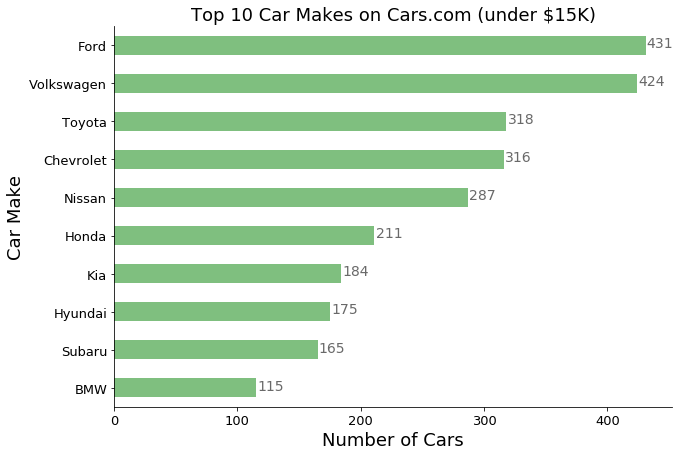

In [36]:
# Top 10 cars make on the market

ax  = car_db.groupby("Car_Make")["Name"].count().sort_values(ascending=False).nlargest(10).plot(kind='barh', 
                                                                            figsize=(10,7),color="green", alpha=0.5, fontsize=13);

# ax.set_alpha(0.8)
ax.set_title("Top 10 Car Makes on Cars.com (under $15K)", fontsize=18)
ax.set_xlabel("Number of Cars", fontsize=18)
ax.set_ylabel("Car Make", fontsize=18)

# # create a list to collect the plt.patches data
# totals = []
# # find the values and append to list
# for i in ax.patches:
#     totals.append(i.get_width())

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+1, i.get_y()+0.3, \
            str(i.get_width()), fontsize=14,
            color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


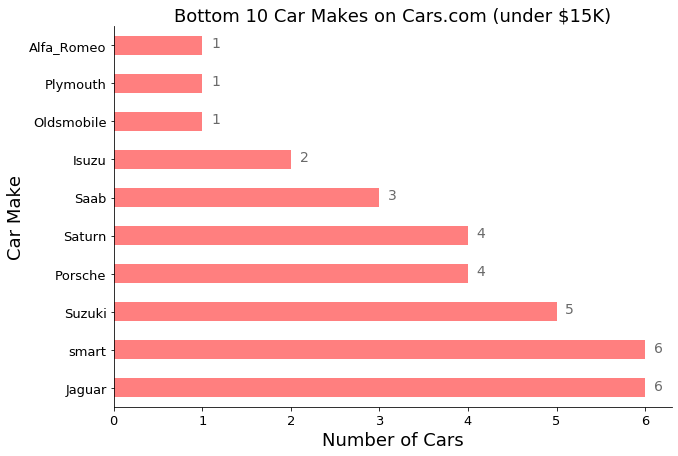

In [37]:
# Bottom 10 cars make on the market

ax  = car_db.groupby("Car_Make")["Name"].count().sort_values(ascending=True).head(10).plot(kind='barh', 
                                                                            figsize=(10,7),color="red", alpha=0.5, fontsize=13);

ax.set_title("Bottom 10 Car Makes on Cars.com (under $15K)", fontsize=18)
ax.set_xlabel("Number of Cars", fontsize=18)
ax.set_ylabel("Car Make", fontsize=18)

# # create a list to collect the plt.patches data
# totals = []
# # find the values and append to list
# for i in ax.patches:
#     totals.append(i.get_width())

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+0.1, i.get_y()+0.3, \
            str(i.get_width()), fontsize=14,
            color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [41]:
# Of the cars on the market, what's the min, max, average price?
car_db.groupby("Car_Make").agg(
    min_age=pd.NamedAgg(column='Car_Age_Year', aggfunc='min'),
    max_age=pd.NamedAgg(column='Car_Age_Year', aggfunc='max'),
    average_age=pd.NamedAgg(column='Car_Age_Year', aggfunc=np.mean),
    min_mileage=pd.NamedAgg(column='Mileage_(Miles)', aggfunc='min'),
    max_mileage=pd.NamedAgg(column='Mileage_(Miles)', aggfunc='max'),
    average_mileage=pd.NamedAgg(column='Mileage_(Miles)', aggfunc=np.mean),
    min_price=pd.NamedAgg(column='Price', aggfunc='min'),
    max_price=pd.NamedAgg(column='Price', aggfunc='max'),
    average_price=pd.NamedAgg(column='Price', aggfunc=np.mean)).nlargest(20, "average_price")
        



,min_age,max_age,average_age,min_mileage,max_mileage,average_mileage,min_price,max_price,average_price
Car_Make,,,,,,,,,
RAM,5.46,8.47,7.353333,68770.0,157028.0,123078.888889,7950.0,14995.0,13538.777778
Volkswagen,1.46,20.47,6.758868,3000.0,205026.0,57659.136792,800.0,15000.0,11510.997642
Kia,1.46,18.47,5.282391,1589.0,248000.0,63609.858696,3888.0,14999.0,11486.423913
Lincoln,7.46,17.47,10.021111,33221.0,176743.0,87848.000000,3995.0,14990.0,11434.222222
FIAT,2.46,8.47,3.949070,2914.0,83821.0,22033.930233,5995.0,14881.0,11328.651163
Hummer,12.47,17.47,15.470000,106270.0,219094.0,168472.222222,7977.0,14995.0,11278.444444
Porsche,12.47,23.47,18.220000,42110.0,136502.0,79141.250000,8995.0,14460.0,11112.500000
Hyundai,1.46,17.47,5.817143,11384.0,227030.0,66526.908571,2500.0,14999.0,10992.445714
Nissan,0.46,21.47,5.911847,0.0,237557.0,64404.024390,2519.0,15000.0,10988.491289


In [42]:
car_db.groupby(['Car_Make', 'Car_Model']).mean()

Mileage_(Miles)         Price  Car_Age_Year
Car_Make Car_Model                                             
Acura    ILX           72523.750000  12367.750000      7.460000
         MDX          133955.111111   9071.666667     12.691111
         RDX           97032.250000  11067.750000     10.967500
         RSX          151674.000000   8995.000000     14.470000
         TL           109129.100000   9681.100000     11.869000
...                             ...           ...           ...
Volvo    V70          135689.000000   3888.000000     19.470000
         XC60          91092.000000  12438.500000      8.965000
         XC70         136097.500000   6747.000000     12.970000
         XC90         129862.375000   7306.000000     13.468750
smart    ForTwo        47062.000000   8433.666667      7.296667

[366 rows x 3 columns]

In [44]:
# Most popular body_styles
top_bodystyles  = car_db.groupby("Body_style")["Name"].count().sort_values(ascending=False).nlargest(10)
top_bodystyles

Body_style
Sedan                  1614
SUV                     842
Hatchback               409
Wagon                   137
Coupe                   106
Crew Cab Pickup         103
Minivan                  85
Extended Cab Pickup      81
Convertible              43
Regular Cab Pickup       35
Name: Name, dtype: int64

In [46]:
# Of the type of body_styles on the market, what's the min, max, average price?
car_db.groupby("Body_style").agg(
    min_price=pd.NamedAgg(column='Price', aggfunc='min'),
    max_price=pd.NamedAgg(column='Price', aggfunc='max'),
    average_price=pd.NamedAgg(column='Price', aggfunc=np.mean)).nlargest(20, "average_price")

,min_price,max_price,average_price
Body_style,,,
Crew Cab Pickup,3400.0,14995.0,11046.446602
Passenger Van,4995.0,14995.0,10983.230769
Sedan,800.0,15000.0,10768.526022
SUV,1495.0,15000.0,10300.935867
Hatchback,1499.0,15000.0,10283.312958
Cargo Van,5000.0,15000.0,9933.166667
Extended Cab Pickup,2750.0,15000.0,9902.098765
Convertible,2995.0,14999.0,9899.627907
Coupe,2388.0,15000.0,9415.311321


## Seaborn
* https://towardsdatascience.com/a-guide-to-pandas-and-matplotlib-for-data-exploration-56fad95f951c

In [47]:
import seaborn as sns

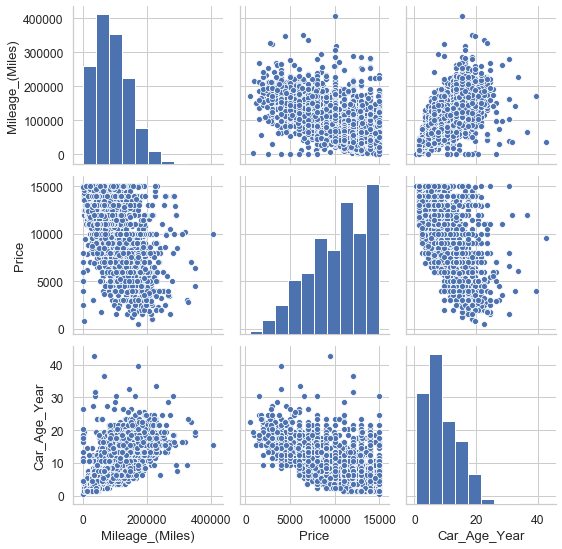

In [63]:
# sns.pairplot(car_db.loc[:,car_db.dtypes == 'float64'])
sns.pairplot(car_db);

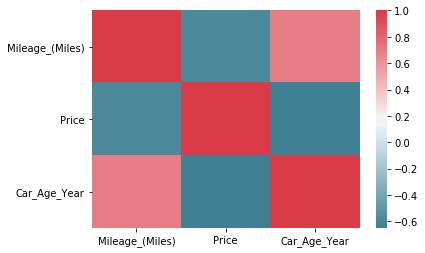

In [52]:
corr = car_db.loc[:,car_db.dtypes == 'float64'].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))

In [56]:
# filtered_class = car_db['Car_Make']
# sns.lmplot("Transmission", "Price", data=filtered_class, hue="Transmission", fit_reg=False, col='Car_Make', col_wrap=2)

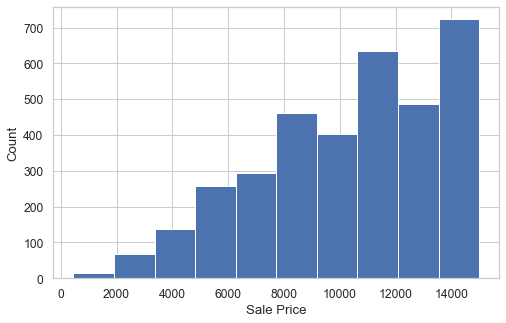

In [58]:
# https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    car_db['Price'], norm_hist=False, kde=False, bins=10, hist_kws={"alpha": 1}
).set(xlabel='Sale Price', ylabel='Count');

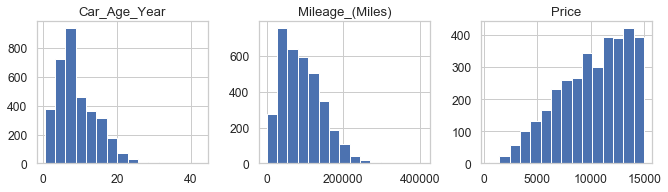

In [69]:
numerical=["Price", "Mileage_(Miles)","Car_Age_Year"]
car_db[numerical].hist(bins=15, figsize=(15, 6), layout=(2, 4));

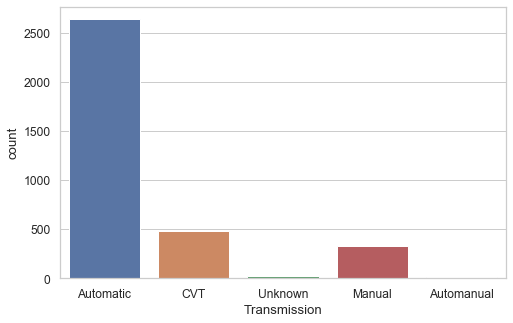

In [72]:
sns.countplot(car_db['Transmission'])

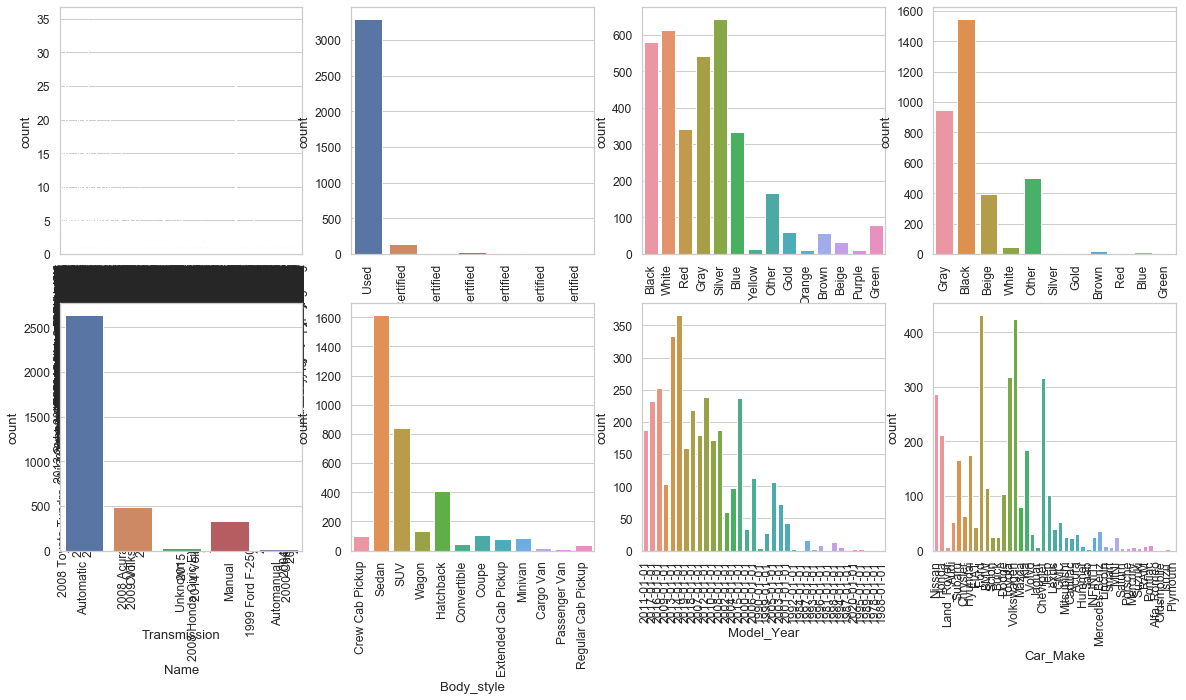

In [73]:
categorical=["Name", "Stocktype","Ext_color", "Int_color",          
"Transmission", "Body_style", "Model_Year", "Car_Make", "Car_Model","Car_Trim"]

fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(car_db[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

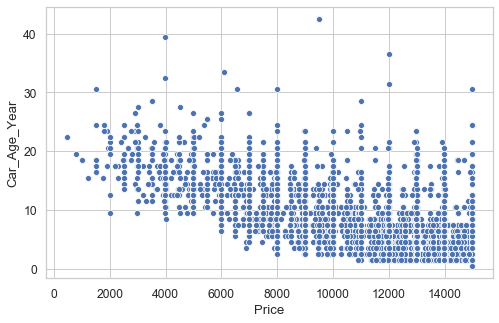

In [74]:
sns.scatterplot(x=car_db['Price'], y=car_db['Car_Age_Year']);

In [71]:
# import matplotlib.pyplot as plt
# from matplotlib.ticker import StrMethodFormatter

# ax = car_db.hist(column='Car_Make', by='Car_Model', bins=25, grid=False, figsize=(8,10), layout=(358,1), sharex=True, color='#86bf91', zorder=2, rwidth=0.9)

# for i,x in enumerate(ax):

#     # Despine
#     x.spines['right'].set_visible(False)
#     x.spines['top'].set_visible(False)
#     x.spines['left'].set_visible(False)

#     # Switch off ticks
#     x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

#     # Draw horizontal axis lines
#     vals = x.get_yticks()
#     for tick in vals:
#         x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

#     # Set x-axis label
#     x.set_xlabel("Session Duration (Seconds)", labelpad=20, weight='bold', size=12)

#     # Set y-axis label
#     if i == 1:
#         x.set_ylabel("Sessions", labelpad=50, weight='bold', size=12)

#     # Format y-axis label
#     x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

#     x.tick_params(axis='x', rotation=0)